In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\Data Mining\Data sets for lab report\Breast Cancer\Breast_Cancer.csv")

In [3]:
data.columns


Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [4]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4002 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50.0,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58.0,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47.0,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
data.isna().sum()

Age                       22
Race                       0
Marital Status             0
T Stage                    0
N Stage                    0
6th Stage                  0
differentiate              0
Grade                      0
A Stage                    0
Tumor Size                 0
Estrogen Status            0
Progesterone Status        0
Regional Node Examined     0
Reginol Node Positive      0
Survival Months            0
Status                    42
dtype: int64

In [6]:
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

In [7]:
mode_status = data['Status'].mode()[0]
data['Status'].fillna(mode_status, inplace=True)

In [8]:
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [9]:
data['Status'].value_counts()

Status
Alive    3416
Dead      608
Name: count, dtype: int64

In [10]:
data.duplicated().sum()

1

In [11]:
df = data.copy()
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called `df`

# Convert columns to appropriate data types
df['Age'] = df['Age'].astype(int)
df['Race'] = df['Race'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
# df['T Stage'] = df['T Stage'].astype('category')
df['N Stage'] = df['N Stage'].astype('category')
df['6th Stage'] = df['6th Stage'].astype('category')
df['differentiate'] = df['differentiate'].astype('category')
df['Grade'] = df['Grade'].astype('category')
df['A Stage'] = df['A Stage'].astype('category')
df['Tumor Size'] = df['Tumor Size'].astype(float)
df['Estrogen Status'] = df['Estrogen Status'].astype('category')
df['Progesterone Status'] = df['Progesterone Status'].astype('category')
df['Regional Node Examined'] = df['Regional Node Examined'].astype(int)
df['Reginol Node Positive'] = df['Reginol Node Positive'].astype(int)
df['Survival Months'] = df['Survival Months'].astype(float)
df['Status'] = df['Status'].astype('category')

# Verify the data types
print(df.dtypes)

Age                          int32
Race                      category
Marital Status            category
T Stage                     object
N Stage                   category
6th Stage                 category
differentiate             category
Grade                     category
A Stage                   category
Tumor Size                 float64
Estrogen Status           category
Progesterone Status       category
Regional Node Examined       int32
Reginol Node Positive        int32
Survival Months            float64
Status                    category
dtype: object


In [14]:
def find_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    condition = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df[condition]
    
    return outliers

In [15]:
age_outliers = find_outliers(df, 'Age')
age_outliers

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status


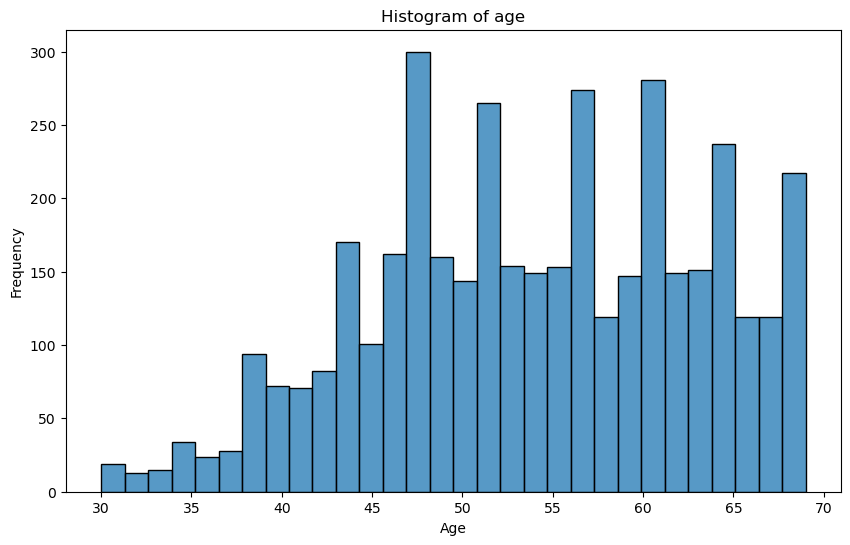

In [16]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30)
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

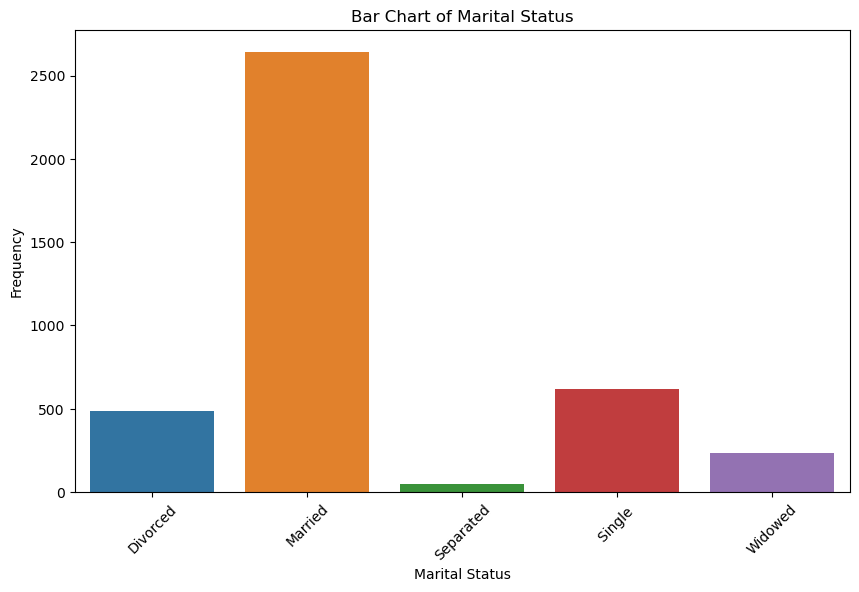

In [33]:
# Bar plot for 
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Marital Status'])
plt.title('Bar Chart of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

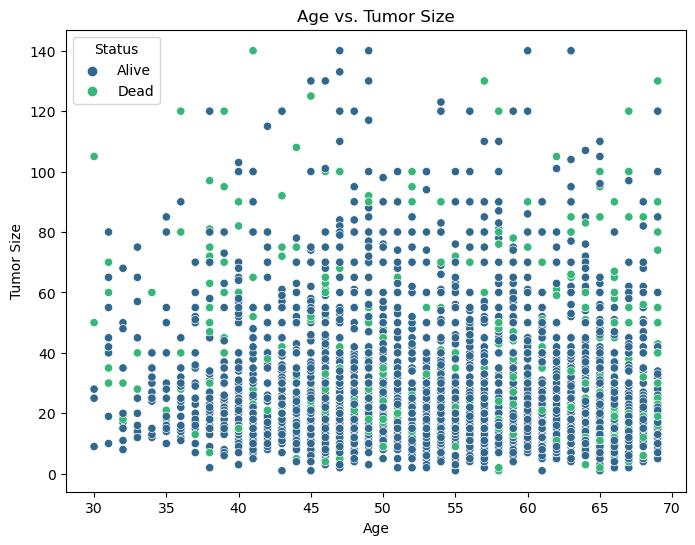

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Tumor Size', data=df, hue='Status', palette='viridis')
plt.title('Age vs. Tumor Size')
plt.xlabel('Age')
plt.ylabel('Tumor Size')
plt.show()

In [89]:
data_clean = df.copy()
categorical_cols = data_clean.describe(include='category').columns
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_cols:
    data_clean[column + '_Encoded'] = label_encoder.fit_transform(data_clean[column])

In [91]:
data_clean.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,...,Race_Encoded,Marital Status_Encoded,N Stage_Encoded,6th Stage_Encoded,differentiate_Encoded,Grade_Encoded,A Stage_Encoded,Estrogen Status_Encoded,Progesterone Status_Encoded,Status_Encoded
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,...,2,1,0,0,1,3,1,1,1,0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,...,2,1,1,2,0,2,1,1,1,0
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,...,2,0,2,4,0,2,1,1,1,0
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,...,2,1,0,0,1,3,1,1,1,0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,...,2,1,0,1,1,3,1,1,1,0


In [93]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("Before Normalized DataFrame:")
print(data_clean['Age'].describe())


# Select numerical columns (excluding encoded categorical columns)
numerical_columns = data_clean.select_dtypes(include=['int64', 'float64','int32']).columns

# Normalize using MinMaxScaler (scales values to a range of 0 to 1)
scaler = MinMaxScaler()
data_clean[numerical_columns] = scaler.fit_transform(data_clean[numerical_columns])
print("After Normalized DataFrame:")
print(data_clean['Age'].describe())

Before Normalized DataFrame:
count    4023.000000
mean       53.975143
std         8.937730
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: Age, dtype: float64
After Normalized DataFrame:
count    4023.000000
mean        0.614747
std         0.229173
min         0.000000
25%         0.435897
50%         0.615385
75%         0.794872
max         1.000000
Name: Age, dtype: float64


In [95]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_clean.drop(columns=['Status'])  # Features (all columns except target)
y = data_clean['Status']  # Target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Display the split datasets
print("Train set:",X_train.shape,y_train.shape)
print("\nTest set:",X_test.shape,y_test.shape)

Train set: (2816, 25) (2816,)

Test set: (1207, 25) (1207,)


In [113]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
d = df.copy()
# Apply label encoding to each categorical column
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Check the encoded DataFrame
print(df.head())

   Age   Race Marital Status  T Stage  N Stage 6th Stage  \
0   68  White        Married         0      N1       IIA   
1   50  White        Married         1      N2      IIIA   
2   58  White       Divorced         2      N3      IIIC   
3   58  White        Married         0      N1       IIA   
4   47  White        Married         1      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional         4.0        Positive   
1  Moderately differentiated     2  Regional        35.0        Positive   
2  Moderately differentiated     2  Regional        63.0        Positive   
3      Poorly differentiated     3  Regional        18.0        Positive   
4      Poorly differentiated     3  Regional        41.0        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                 

In [137]:
# Perform one-hot encoding on feature columns only
X = df.drop(columns=['Status'])  # Features (all columns except 'Status')
X_encoded = pd.get_dummies(X, drop_first=True)  # One-hot encode feature columns

# Target variable
y = df['Status']  # Do not encode the target column



In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [141]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [143]:
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

                                Feature  Importance
5                       Survival Months    0.369299
0                                   Age    0.117851
2                            Tumor Size    0.102647
3                Regional Node Examined    0.099505
4                 Reginol Node Positive    0.079135
1                              T Stage     0.025901
26         Progesterone Status_Positive    0.023114
8                Marital Status_Married    0.020210
13                           N Stage_N3    0.015071
7                            Race_White    0.014515
25             Estrogen Status_Positive    0.014085
10               Marital Status_Single     0.013382
17                       6th Stage_IIIC    0.011677
23                              Grade_3    0.009757
6                            Race_Other    0.009490
18  differentiate_Poorly differentiated    0.008856
11               Marital Status_Widowed    0.008761
12                           N Stage_N2    0.008555
22          

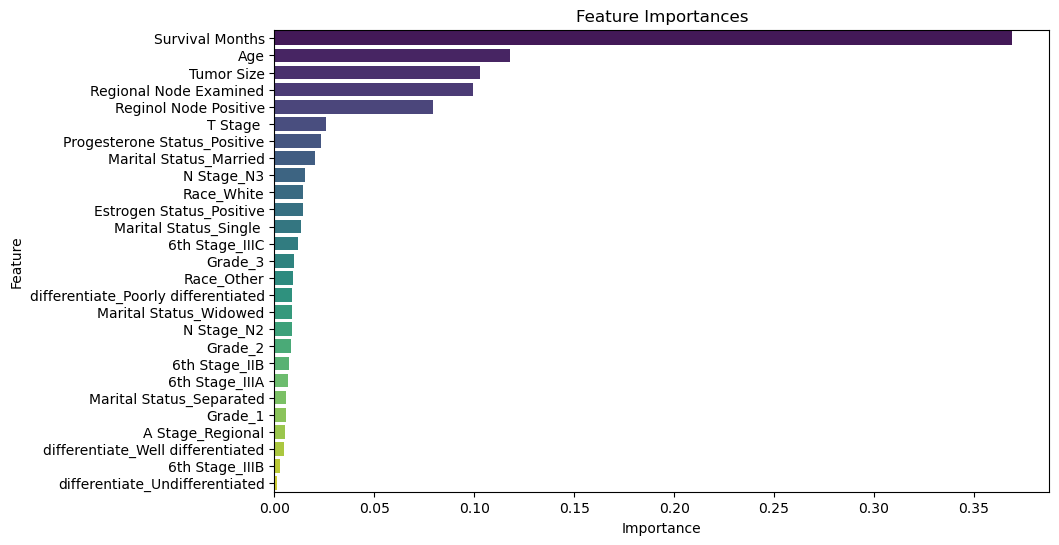

In [147]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [131]:
print(df.columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [151]:
# Initialize the Decision Tree Classifier with entropy
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [157]:
class_names = data['Status'].unique().tolist()

In [159]:
class_names

['Alive', 'Dead']

[Text(0.39546237104916593, 0.98, 'x[5] <= 47.5\nentropy = 0.609\nsamples = 3218\nvalue = [2736, 482]'),
 Text(0.11342186128182616, 0.94, 'x[0] <= 61.5\nentropy = 0.881\nsamples = 377\nvalue = [113, 264]'),
 Text(0.045983318700614575, 0.9, 'x[25] <= 0.5\nentropy = 0.958\nsamples = 279\nvalue = [106, 173]'),
 Text(0.007023705004389816, 0.86, 'x[2] <= 7.0\nentropy = 0.232\nsamples = 53\nvalue = [2, 51]'),
 Text(0.003511852502194908, 0.82, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.010535557506584723, 0.82, 'x[14] <= 0.5\nentropy = 0.137\nsamples = 52\nvalue = [1, 51]'),
 Text(0.007023705004389816, 0.78, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(0.014047410008779631, 0.78, 'x[2] <= 25.0\nentropy = 0.469\nsamples = 10\nvalue = [1, 9]'),
 Text(0.010535557506584723, 0.74, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.01755926251097454, 0.74, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.08494293239683934, 0.86, 'x[4] <= 5.5\nentropy = 0.995\nsamples 

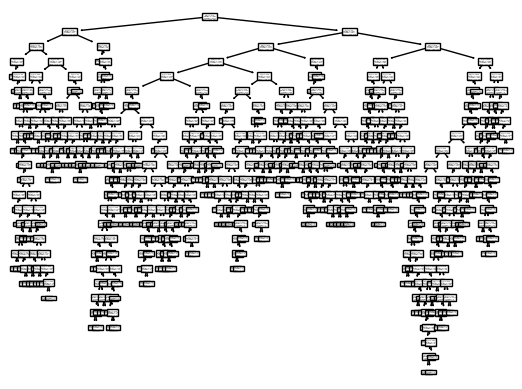

In [174]:
tree.plot_tree(model)

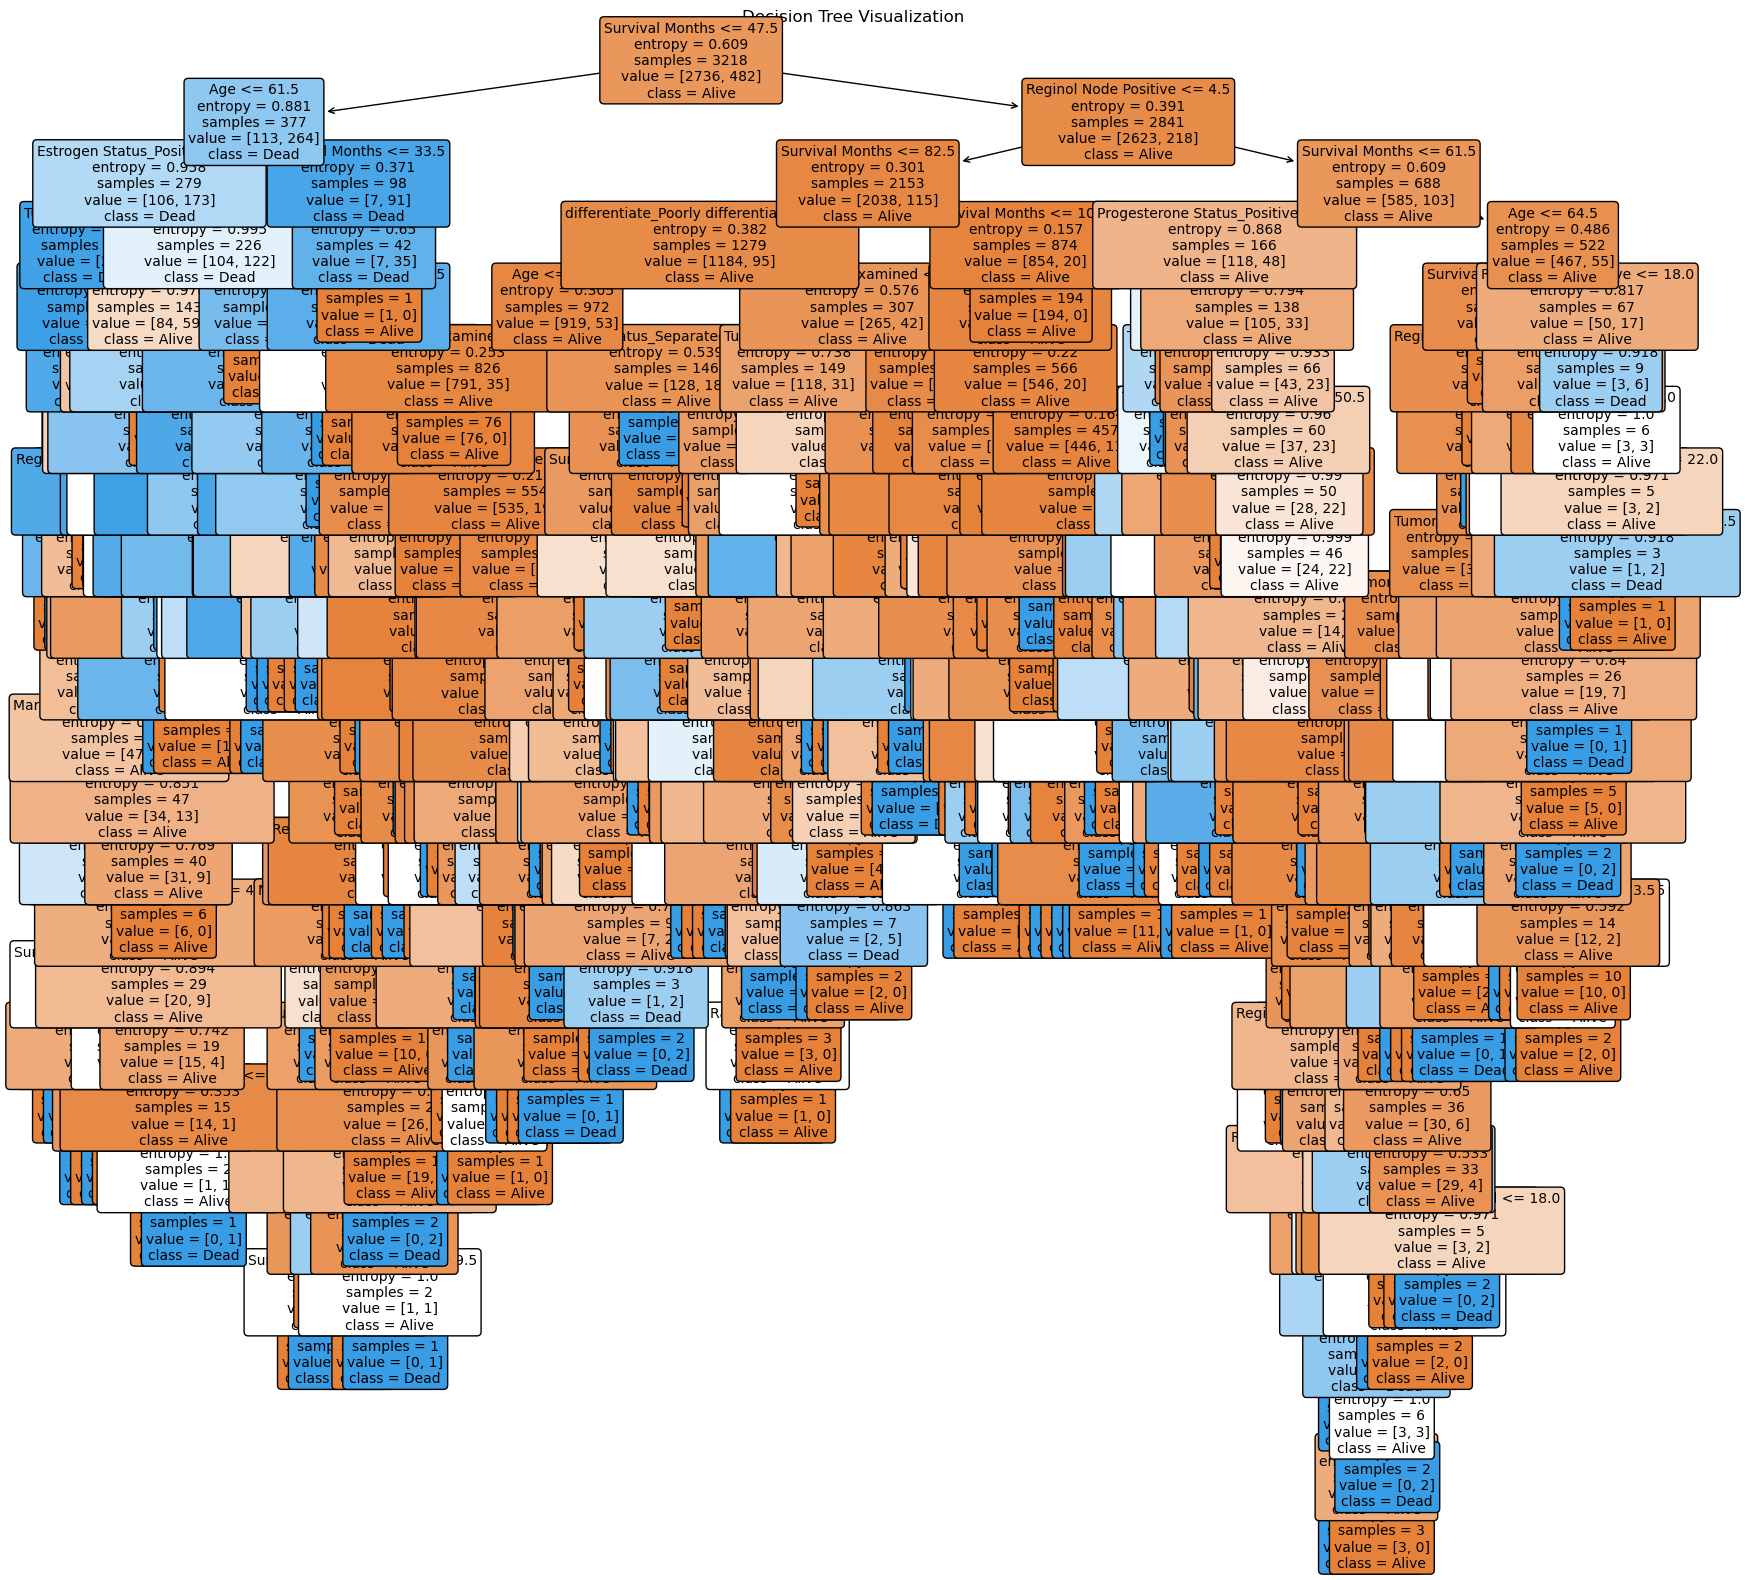

In [172]:
# Plot the decision tree
plt.figure(figsize=(20, 20))  # Set figure size
plot_tree(
    model, 
    filled=True,  # Fill nodes with colors
    feature_names=X_train.columns,  # Use feature names
    class_names=model.classes_,  # Use class names
    rounded=True,  # Rounded nodes
    fontsize=10  # Font size
)
plt.title("Decision Tree Visualization")
plt.show()

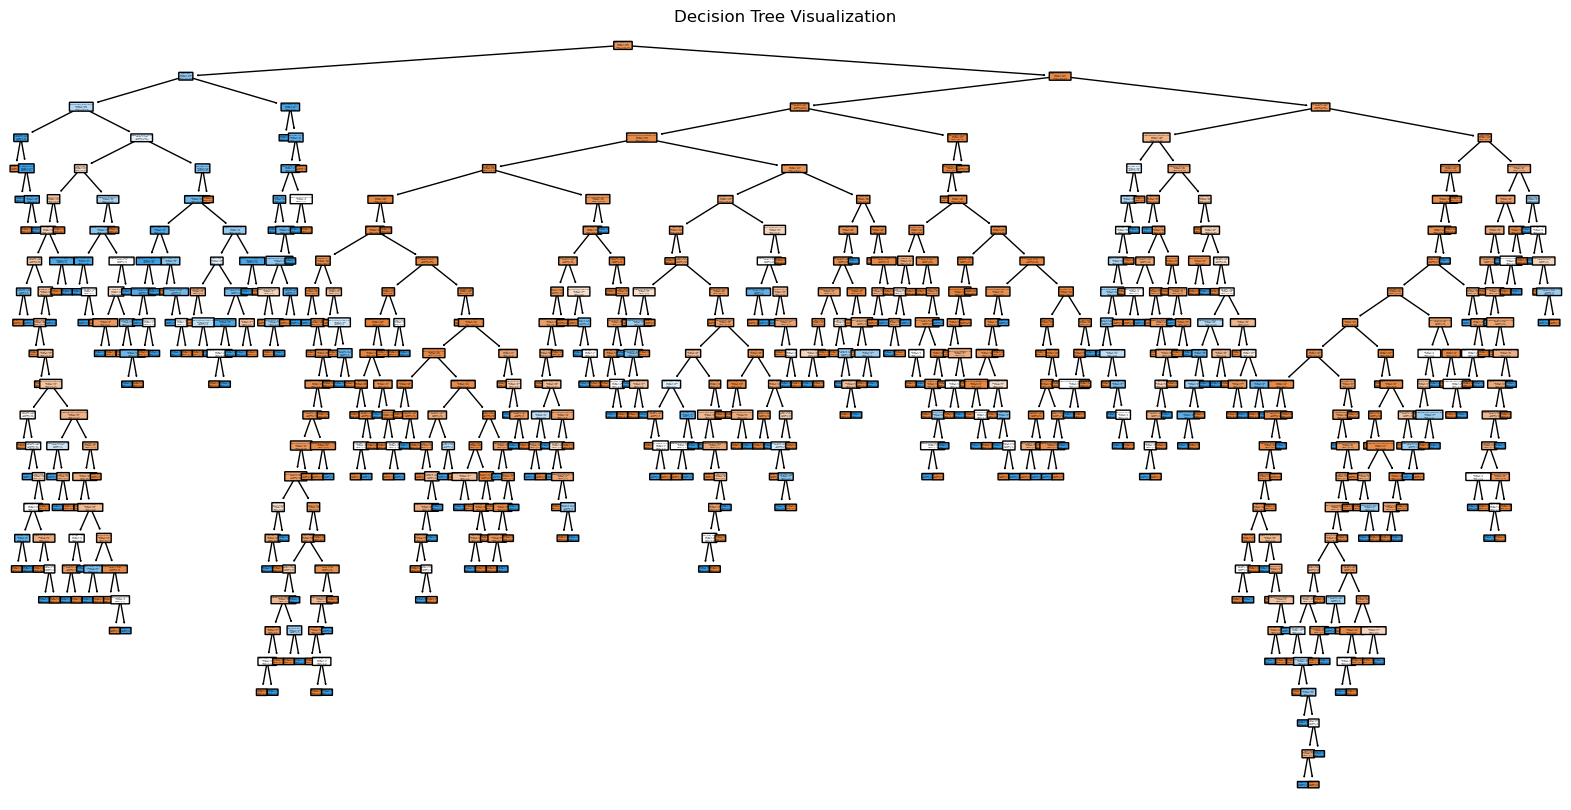

In [184]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model,feature_names=X_encoded.columns,class_names=model.classes_,filled=True,  # Fill nodes with colors
    rounded=True)
plt.title("Decision Tree Visualization")
plt.show()